In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv("dataset_hebdo_psl_covid_2019_2021.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date").set_index("Date")
y = df["Passages_Hebdo"].astype(float).asfreq("W-MON").ffill()
lits = df["Lits_Capacite"].astype(float).asfreq("W-MON").ffill()
tension = df["Indice_Tension"].astype(float).asfreq("W-MON").ffill()
df_feat = df.copy()
df_feat["year"] = df_feat.index.year
df_feat["month"] = df_feat.index.month
df_feat["week"] = df_feat.index.isocalendar().week.astype(int)

In [2]:
print("=== PÉRIODE ===")
print("Début:", df_feat.index.min().date(), "| Fin:", df_feat.index.max().date(), "| nb semaines:", len(df_feat))

print("\n=== STAT GLOBALES ===")
print("Passages hebdo - moyenne:", round(y.mean(), 1), "| médiane:", round(y.median(), 1),
      "| min:", int(y.min()), "| max:", int(y.max()), "| std:", round(y.std(), 1))

print("\n=== TENSION & LITS ===")
print("Lits - min:", int(lits.min()), "| max:", int(lits.max()), "| moyenne:", round(lits.mean(), 1))
print("Indice tension - min:", round(tension.min(), 2), "| max:", round(tension.max(), 2), "| moyenne:", round(tension.mean(), 2))

annual_passages = y.resample("YE").sum()
annual_mean = y.resample("YE").mean()

print("\n=== PASSAGES ANNUELS (total) ===")
print(annual_passages)

print("\n=== PASSAGES HEBDO MOYEN PAR AN ===")
print(annual_mean)

yoy = annual_passages.pct_change() * 100
print("\n=== VARIATION ANNUELLE (%) ===")
print(yoy)

print("\n=== EXTRÊMES ===")
print("Min hebdo:", int(y.min()), "le", y.idxmin().date())
print("Max hebdo:", int(y.max()), "le", y.idxmax().date())

=== PÉRIODE ===
Début: 2019-01-07 | Fin: 2022-01-03 | nb semaines: 157

=== STAT GLOBALES ===
Passages hebdo - moyenne: 2005.2 | médiane: 2030.0 | min: 920 | max: 3340 | std: 506.1

=== TENSION & LITS ===
Lits - min: 2100 | max: 2250 | moyenne: 2176.6
Indice tension - min: 6.3 | max: 21.2 | moyenne: 13.12

=== PASSAGES ANNUELS (total) ===
Date
2019-12-31    126220.0
2020-12-31     88130.0
2021-12-31     99040.0
2022-12-31      1430.0
Freq: YE-DEC, Name: Passages_Hebdo, dtype: float64

=== PASSAGES HEBDO MOYEN PAR AN ===
Date
2019-12-31    2427.307692
2020-12-31    1694.807692
2021-12-31    1904.615385
2022-12-31    1430.000000
Freq: YE-DEC, Name: Passages_Hebdo, dtype: float64

=== VARIATION ANNUELLE (%) ===
Date
2019-12-31          NaN
2020-12-31   -30.177468
2021-12-31    12.379439
2022-12-31   -98.556139
Freq: YE-DEC, Name: Passages_Hebdo, dtype: float64

=== EXTRÊMES ===
Min hebdo: 920 le 2020-04-13
Max hebdo: 3340 le 2019-12-09


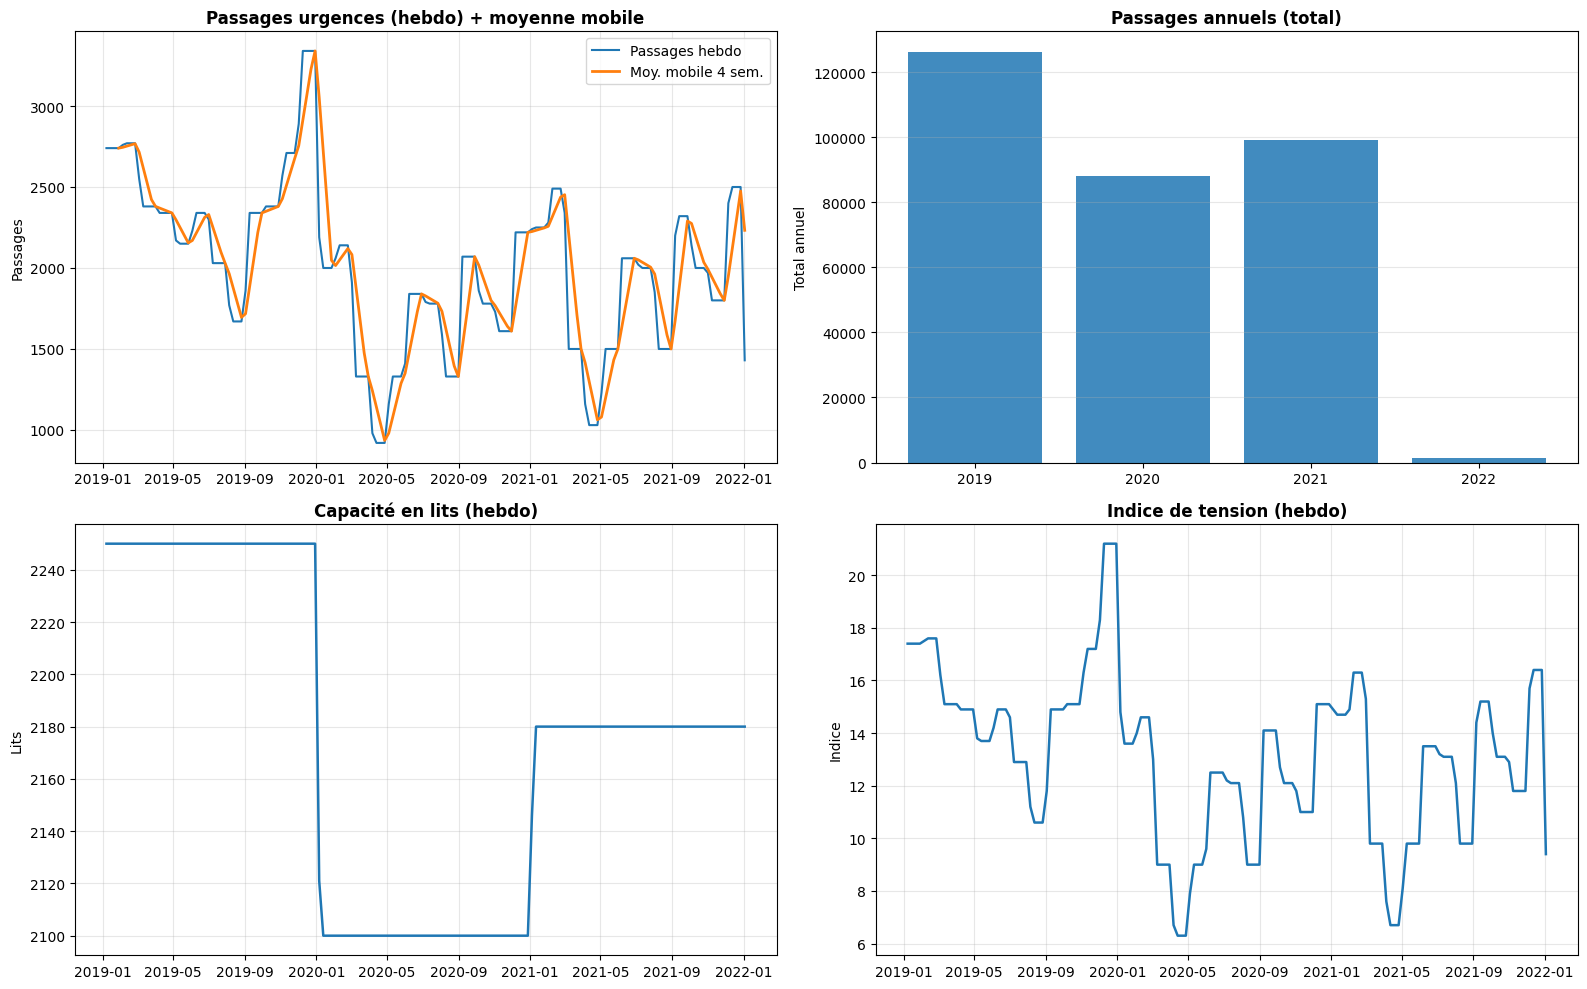

In [3]:
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# (A) Série temporelle passages + moyenne mobile
axes[0,0].plot(y.index, y.values, linewidth=1.5, label="Passages hebdo")
axes[0,0].plot(y.rolling(4).mean(), linewidth=2, label="Moy. mobile 4 sem.")
axes[0,0].set_title("Passages urgences (hebdo) + moyenne mobile", fontweight="bold")
axes[0,0].set_ylabel("Passages")
axes[0,0].grid(True, alpha=0.3)
axes[0,0].legend()

# (B) Totaux annuels (barres)
years = [str(d.year) for d in annual_passages.index]
axes[0,1].bar(years, annual_passages.values, alpha=0.85)
axes[0,1].set_title("Passages annuels (total)", fontweight="bold")
axes[0,1].set_ylabel("Total annuel")
axes[0,1].grid(True, alpha=0.3, axis="y")

# (C) Lits vs temps
axes[1,0].plot(lits.index, lits.values, linewidth=1.8, label="Lits capacité")
axes[1,0].set_title("Capacité en lits (hebdo)", fontweight="bold")
axes[1,0].set_ylabel("Lits")
axes[1,0].grid(True, alpha=0.3)

# (D) Tension vs temps
axes[1,1].plot(tension.index, tension.values, linewidth=1.8, label="Indice tension")
axes[1,1].set_title("Indice de tension (hebdo)", fontweight="bold")
axes[1,1].set_ylabel("Indice")
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

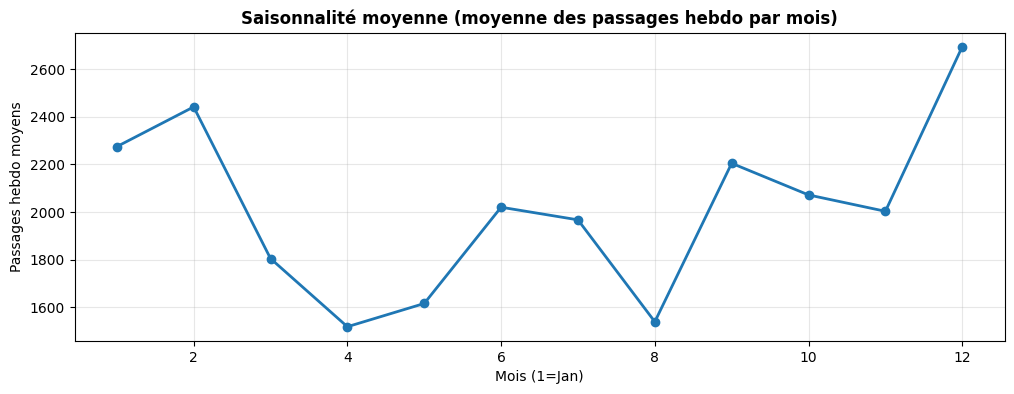

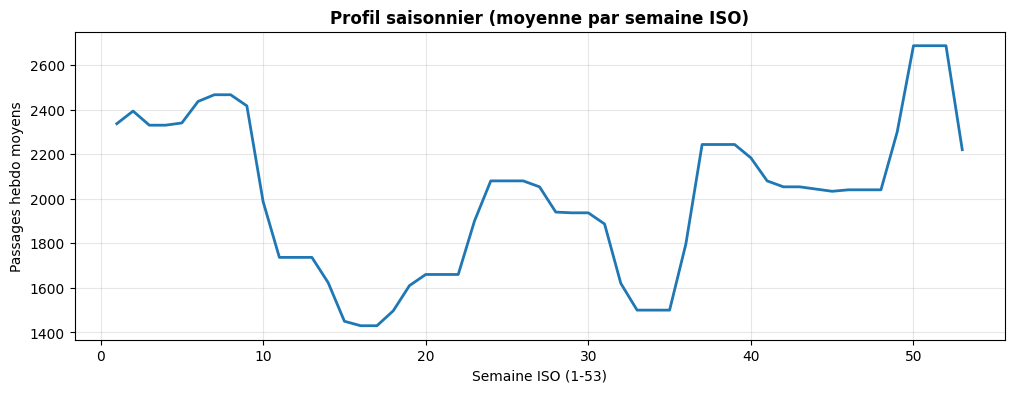

In [4]:
# (A) Moyenne par mois (sur 3 ans)
monthly_mean = df_feat.groupby("month")["Passages_Hebdo"].mean()

plt.figure(figsize=(12,4))
plt.plot(monthly_mean.index, monthly_mean.values, marker="o", linewidth=2)
plt.title("Saisonnalité moyenne (moyenne des passages hebdo par mois)", fontweight="bold")
plt.xlabel("Mois (1=Jan)")
plt.ylabel("Passages hebdo moyens")
plt.grid(True, alpha=0.3)
plt.show()

# (B) Profil hebdomadaire sur l'année (moyenne par semaine ISO)
weekly_profile = df_feat.groupby("week")["Passages_Hebdo"].mean()

plt.figure(figsize=(12,4))
plt.plot(weekly_profile.index, weekly_profile.values, linewidth=2)
plt.title("Profil saisonnier (moyenne par semaine ISO)", fontweight="bold")
plt.xlabel("Semaine ISO (1-53)")
plt.ylabel("Passages hebdo moyens")
plt.grid(True, alpha=0.3)
plt.show()

C:\Users\HugoG\AppData\Local\Temp\ipykernel_6092\790289958.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_year, labels=labels)


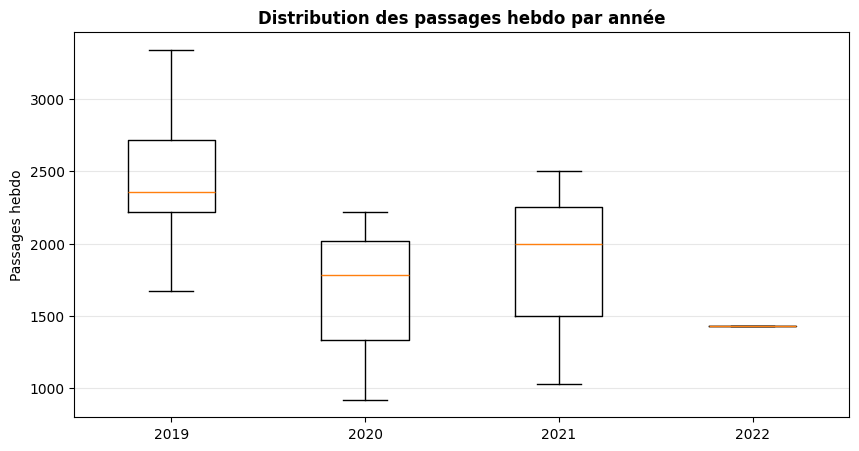

In [5]:
# Boxplot (dispersion) par année
data_by_year = [df_feat[df_feat["year"]==yr]["Passages_Hebdo"].values for yr in sorted(df_feat["year"].unique())]
labels = [str(yr) for yr in sorted(df_feat["year"].unique())]

plt.figure(figsize=(10,5))
plt.boxplot(data_by_year, labels=labels)
plt.title("Distribution des passages hebdo par année", fontweight="bold")
plt.ylabel("Passages hebdo")
plt.grid(True, alpha=0.3, axis="y")
plt.show()


=== CORRÉLATIONS (Pearson) ===
Passages vs Tension: 0.995
Lits vs Passages: 0.584
Lits vs Tension: 0.504


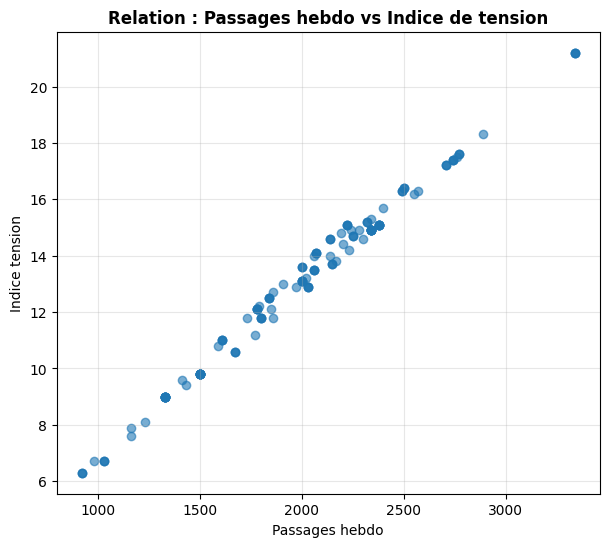

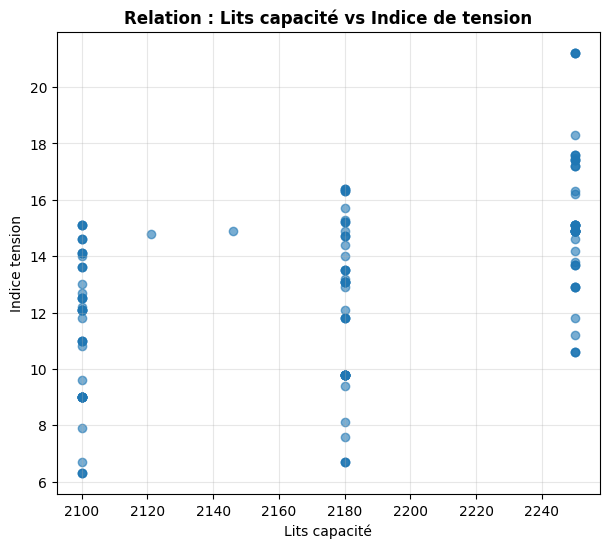

In [6]:
# Corrélations (très utile à commenter)
corr_py = np.corrcoef(y.values, tension.values)[0,1]
corr_ly = np.corrcoef(lits.values, y.values)[0,1]
corr_lt = np.corrcoef(lits.values, tension.values)[0,1]

print("\n=== CORRÉLATIONS (Pearson) ===")
print("Passages vs Tension:", round(corr_py, 3))
print("Lits vs Passages:", round(corr_ly, 3))
print("Lits vs Tension:", round(corr_lt, 3))

# Scatter tension vs passages
plt.figure(figsize=(7,6))
plt.scatter(y.values, tension.values, alpha=0.6)
plt.title("Relation : Passages hebdo vs Indice de tension", fontweight="bold")
plt.xlabel("Passages hebdo")
plt.ylabel("Indice tension")
plt.grid(True, alpha=0.3)
plt.show()

# Scatter lits vs tension
plt.figure(figsize=(7,6))
plt.scatter(lits.values, tension.values, alpha=0.6)
plt.title("Relation : Lits capacité vs Indice de tension", fontweight="bold")
plt.xlabel("Lits capacité")
plt.ylabel("Indice tension")
plt.grid(True, alpha=0.3)
plt.show()